In [1]:
import torch
torch.__version__

'2.8.0+cu128'

In [2]:
from src.vector_store import ImageVectorPipeline
from src.symantic_search import SemanticSearcher
from src.explain_images import ExplanationGenerator
from utils.image_utils import display_base64_image
from langchain_openai import ChatOpenAI

In [3]:
llm = ChatOpenAI(
    model="local-model",   # The model name shown in LM Studio
    base_url="http://localhost:1234/v1",  # LM Studio server endpoint
    api_key="not-needed"   # Required arg, but ignored by LM Studio
)

In [4]:
pipeline = ImageVectorPipeline(persist_dir="chroma_db")
searcher = SemanticSearcher(pipeline.get_vectorstore())
explainer = ExplanationGenerator(llm_model=llm)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [5]:
query = "a dog playing in the park"
results = searcher.search(query, k=5)

In [6]:
results[1]["metadata"]

{'filename': './data/images\\14768.jpg'}

In [7]:
explainer.explain(query,results[1]["content"])

'The image shows a dog sitting on a swing in what appears to be a park, dressed in an orange jacket, suggesting it might have been playing or exploring before settling down for a rest. The setting and attire align well with the query of "a dog playing in the park."'

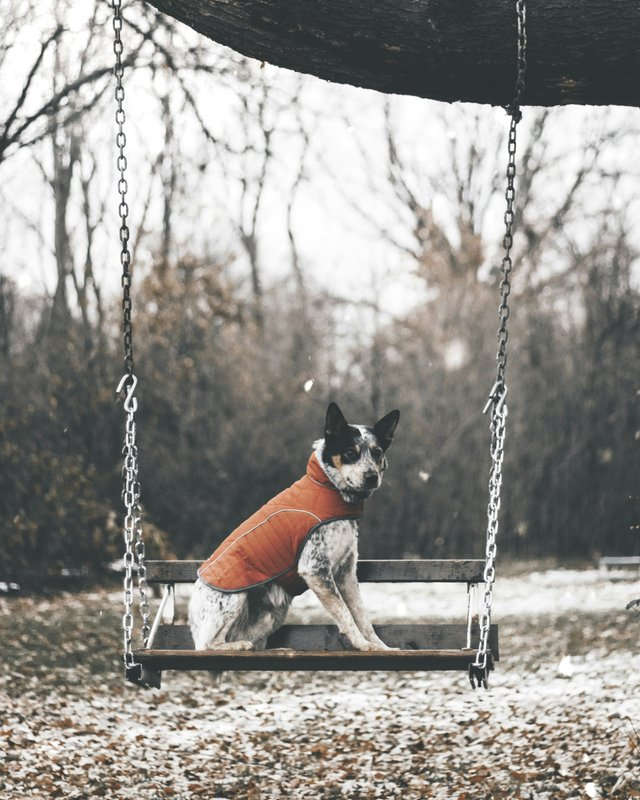

In [8]:
display_base64_image(results[1]["content"])

# calling the API

Image: ./data/images\0457.jpg
Explanation: The image shows a golden retriever sitting on a moss-covered tree stump in what appears to be a park, surrounded by greenery and trees. This scene aligns well with the query as it depicts an outdoor setting where dogs are commonly found playing or exploring.
Score: 70.07369995117188


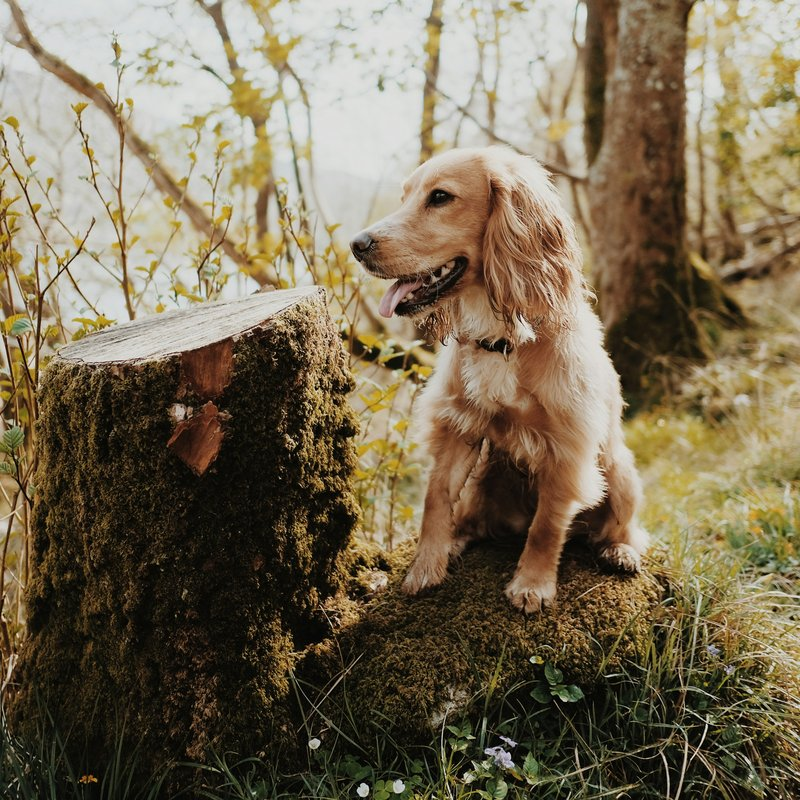

---
Image: ./data/images\14768.jpg
Explanation: The image shows a dog sitting on a swing in what appears to be a park setting, dressed in an orange jacket, which aligns with the query of "a dog playing in the park." The scene suggests a playful or relaxed environment typical for dogs enjoying outdoor activities.
Score: 70.08563232421875


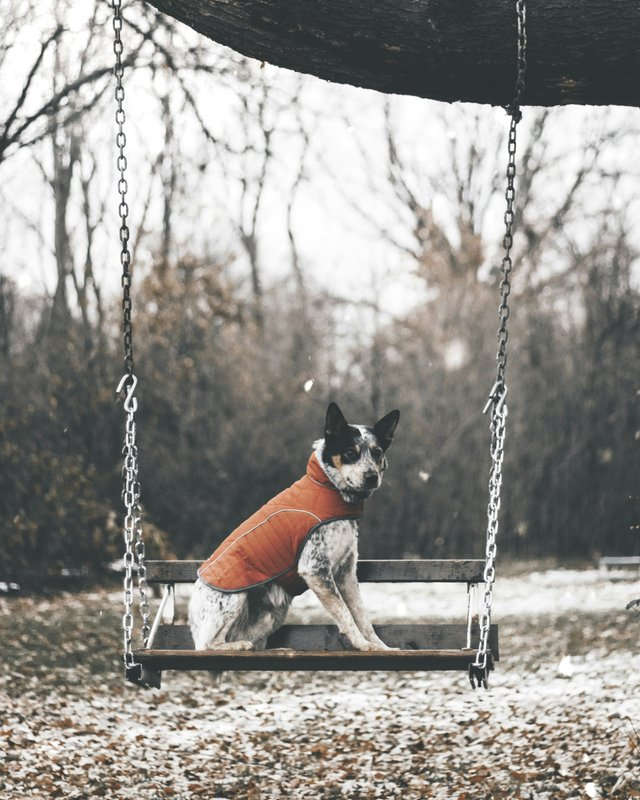

---
Image: ./data/images\16212.jpg
Explanation: The image shows a Weimaraner dog actively running through tall grass, which aligns well with the query of "a dog playing in the park." The dog's posture and environment suggest it is engaged in playful activity outdoors.
Score: 70.15972900390625


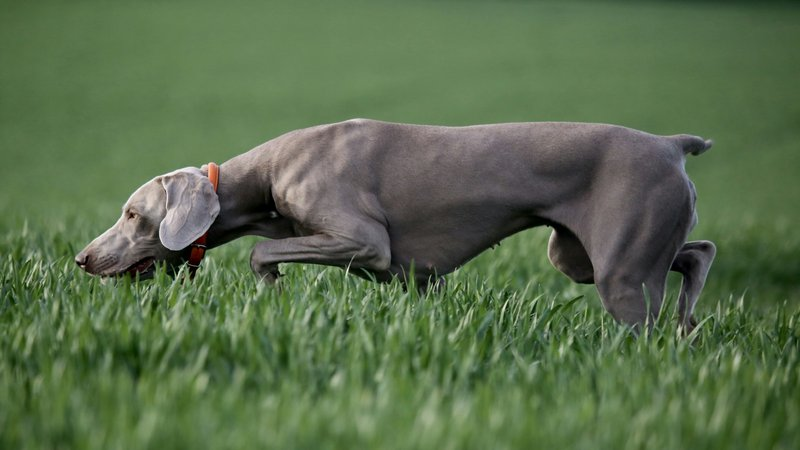

---


In [2]:
import requests

API_URL = "http://localhost:8000"

query = {"query": "a dog playing in the park", "k": 3}
resp = requests.post(f"{API_URL}/search", json=query)
 # debug
results = resp.json()

for r in results:
    print("Image:", r["image_url"])
    print("Explanation:", r["explanation"])
    print("Score:", r["score"])
    display_base64_image(r["image_base64"])
    print("---")
